**リソースの準備セル**

以下の2つのセルの再生ボタンを押して実行に必要なリソースを準備します。

1つめ：ChatGPTのアクセスキーの設定

2つめ：グラフの表示を行う関数、フォントや画像を準備します。興味のある人は覗いてみてね。

・関数を定義

・JupyterNotebookの作業領域にデータを保存します

In [ ]:
OPENAI_SECRET_KEY="ここに共有したシークレットを入れて実行"

In [2]:
!pip install openai
from PIL import Image, ImageDraw, ImageFont
import math
import requests
import random

import random
from PIL import Image, ImageDraw, ImageFont
import math


def create_pie_chart_pil(
    data,
    title="Pie Chart",
    filename="pie_chart_pil.png",
    font_path="DotGothic16-Regular.ttf",
    feature_text="円グラフの解説をここに表示します。"
):
    """
    Create a pie chart using PIL with random colors, a title, and an optional feature text beside the chart.

    Parameters:
    - data: List of dictionaries with keys 'name' (string) and 'ratio' (float between 0 and 1).
    - title: Title of the pie chart.
    - filename: File name to save the pie chart image.
    - font_path: Path to the TTF font file.
    - feature_text: Additional text to display next to the chart for explanation (auto-wrapped to 15 characters per line).
    """

    # Sort data by ratio in descending order
    sorted_data = sorted(data, key=lambda x: x['ratio'], reverse=True)

    # Extract names and ratios
    names = [item['name'] for item in sorted_data]
    ratios = [item['ratio'] for item in sorted_data]

    # Convert ratios to angles
    angles = [r * 360 for r in ratios]

    # Create image and drawing context
    image_width = 900  # Increased width to include space for feature_text
    image_height = 600  # Adjusted height for title and text spacing
    title_height = 50  # Reserved space for the title
    image = Image.new("RGBA", (image_width, image_height), (255, 255, 255, 255))
    draw = ImageDraw.Draw(image)

    # Center and radius of the pie chart
    chart_center = (image_width // 3, (image_height + title_height) // 2)
    radius = image_height // 3

    # Initialize the start angle
    start_angle = -90  # Start at 12 o'clock

    # Load font
    try:
        font = ImageFont.truetype(font_path, 14)
        title_font = ImageFont.truetype(font_path, 20)
        text_font = ImageFont.truetype(font_path, 16)
    except IOError:
        font = ImageFont.load_default()
        title_font = ImageFont.load_default()
        text_font = ImageFont.load_default()

    # Draw title
    title_bbox = draw.textbbox((0, 0), title, font=title_font)
    title_width = title_bbox[2] - title_bbox[0]
    draw.text(((image_width - title_width) // 2, 20), title, fill="black", font=title_font)

    # Draw each segment with random colors
    for name, angle, ratio in zip(names, angles, ratios):
        # End angle for the current segment
        end_angle = start_angle + angle

        # Generate a random color
        random_color = tuple(random.randint(0, 255) for _ in range(3)) + (255,)

        # Draw the pie slice
        draw.pieslice(
            [chart_center[0] - radius, chart_center[1] - radius, chart_center[0] + radius, chart_center[1] + radius],
            start=start_angle,
            end=end_angle,
            fill=random_color,
            outline="black"
        )

        # Calculate label position
        mid_angle = math.radians((start_angle + end_angle) / 2)
        label_x = chart_center[0] + radius * 0.7 * math.cos(mid_angle)
        label_y = chart_center[1] + radius * 0.7 * math.sin(mid_angle)

        # Add label text
        label = f"{name}: {ratio * 100:.1f}%"
        draw.text((label_x, label_y), label, fill="black", font=font, anchor="mm")

        # Update the start angle
        start_angle = end_angle

    # Draw feature text beside the chart with automatic line wrapping
    def wrap_text(text, max_length):
        """Wrap text into lines of at most max_length characters."""
        return [text[i:i+max_length] for i in range(0, len(text), max_length)]

    wrapped_text = wrap_text(feature_text, 15)
    text_x_start = chart_center[0] + radius + 50
    text_y_start = title_height + 100

    for i, line in enumerate(wrapped_text):
        draw.text(
            (text_x_start, text_y_start + i * 20),  # Adjust line spacing (20px)
            line,
            fill="black",
            font=text_font
        )

    # Save the image
    image.save(filename)
    return image

def download_file(url, output_path):
    """
    Download a file from a specified URL and save it locally.

    Args:
        url (str): The URL of the file to download.
        output_path (str): The path where the file will be saved.
    """
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    try:
        response = requests.get(url, stream=True, headers=headers)
        response.raise_for_status()  # Raise an error if the download fails

        with open(output_path, "wb") as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)

    except requests.exceptions.RequestException as e:
        print(f"Failed to download file: {e}")

download_file("https://raw.githubusercontent.com/fontworks-fonts/DotGothic16/14517183ab2f75e8bccafc5a0bff6685d268c687/fonts/ttf/DotGothic16-Regular.ttf", "DotGothic16-Regular.ttf")


**グラフを表示する例**

小学生の好きな飲み物を表示するサンプル

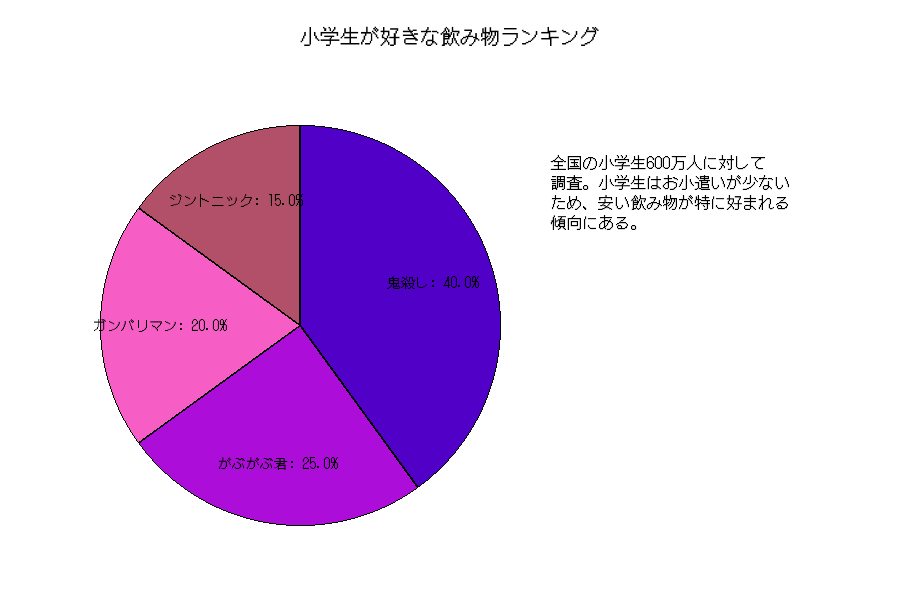

In [ ]:
from IPython.display import Image as IPImage, display

# Example data
example_data = [
    {"name": "鬼殺し", "ratio": 0.4},
    {"name": "がぶがぶ君", "ratio": 0.25},
    {"name": "ガンバリマン", "ratio": 0.2},
    {"name": "ジントニック", "ratio": 0.15},
]

# Create the pie chart
output_path="pie_chart_pil.png"
create_pie_chart_pil(example_data,"小学生が好きな飲み物ランキング",output_path,feature_text="全国の小学生600万人に対して調査。小学生はお小遣いが少ないため、安い飲み物が特に好まれる傾向にある。")
display(IPImage(filename=output_path))

**ChatGPT function callingの例**

架空の都市である2つの都市、冬木市,海底都市ポセイドンの人種割合を推定し、グラフに表示します。

市民は人魚,魔法使い,ダークエルフ,日本人,ホビット のどれかの人種に属します。

それぞれの割合をChatGptに生成してもらいグラフに表示する例です。

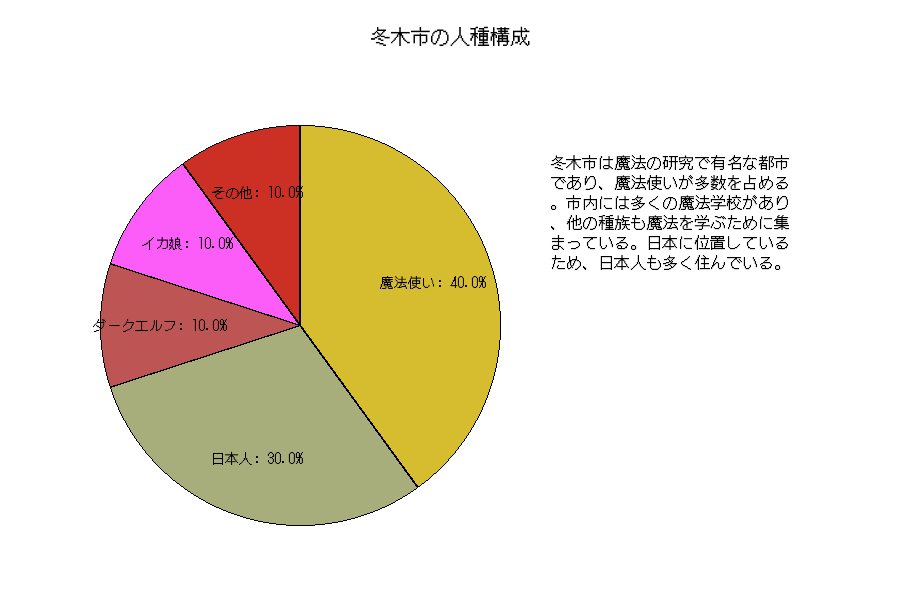

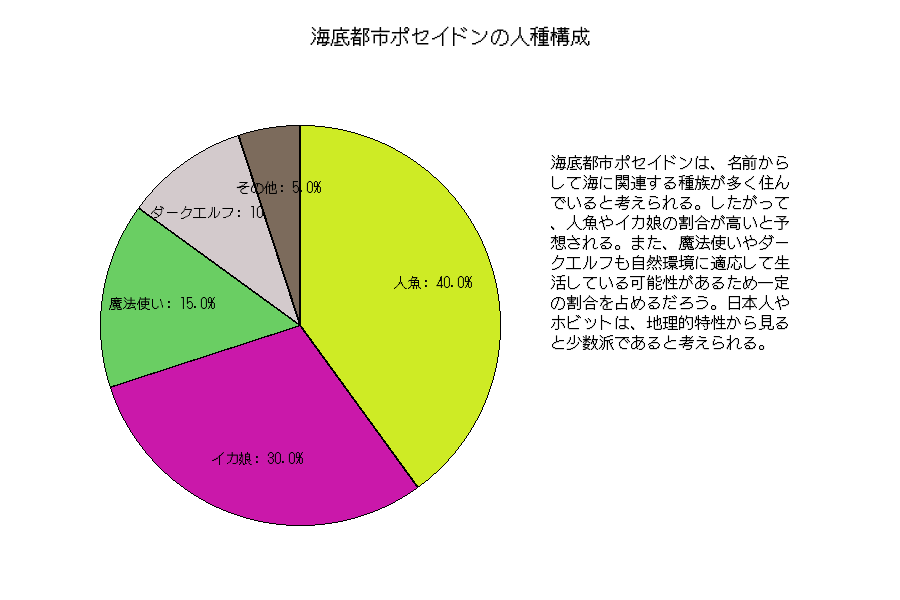

In [ ]:
# API仕様　https://platform.openai.com/docs/guides/function-calling
from openai import OpenAI
import json
from IPython.display import Image as IPImage, display

def get_type_pie(city_name):
    client = OpenAI(api_key=OPENAI_SECRET_KEY)
    response = client.chat.completions.create(
        model="gpt-4o",
        temperature=0.7,
        messages=[
            {"role": "developer", "content": f"{city_name}の名前から人種割合を推測し生成します。割合の合計を1とすること。市民は人魚,魔法使い,ダークエルフ,日本人,イカ娘,ホビット のうちのどれかの人種に属します。"}
        ],
        functions=[
            {
                "name": "make_pie_graph",
                "description": f"{city_name}の名前から人種割合を推測し生成します",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "feature": {
                            "type": "string",
                            "description": "街の人種割合の特徴。断言調で述べてください。その理由も述べる。理由では人口や気候や地理的特性に言及すること。",
                        },
                        "type1": {
                            "type": "object",
                            "description": "人種1の割合",
                            "properties": {
                                "name": {"type": "string", "description": "その市に住む1つめの人種","enum": ["人魚","魔法使い","ダークエルフ","日本人","イカ娘","ホビット"]},
                                "ratio": {"type": "integer", "description": "全体に対して占める割合", "minimum": 0, "maximum": 1},
                            }
                        },
                        "type2": {
                            "type": "object",
                            "description": "人種2の割合",
                            "properties": {
                                "name": {"type": "string", "description": "その市に住む2つめの人種","enum": ["人魚","魔法使い","ダークエルフ","日本人","イカ娘","ホビット"]},
                                "ratio": {"type": "integer", "description": "全体に対して占める割合", "minimum": 0, "maximum": 1},
                            }
                        },
                        "type3": {
                            "type": "object",
                            "description": "人種3の割合",
                            "properties": {
                                "name": {"type": "string", "description": "その市に住む3つめの人種","enum": ["人魚","魔法使い","ダークエルフ","日本人","イカ娘","ホビット"]},
                                "ratio": {"type": "integer", "description": "全体に対して占める割合", "minimum": 0, "maximum": 1},
                            }
                        },
                        "type4": {
                            "type": "object",
                            "description": "人種4の割合",
                            "properties": {
                                "name": {"type": "string", "description": "その市に住む4つめの人種","enum": ["人魚","魔法使い","ダークエルフ","日本人","イカ娘","ホビット"]},
                                "ratio": {"type": "integer", "description": "全体に対して占める割合", "minimum": 0, "maximum": 1},
                            }
                        },
                        "type5": {
                            "type": "object",
                            "description": "その他の人種の割合",
                            "properties": {
                                "name": {"type": "string", "description": "その市に住む5つめ以降の人種の合計","enum": ["その他"]},
                                "ratio": {"type": "integer", "description": "全体に対して占める割合", "minimum": 0, "maximum": 1},
                            }
                        }
                    },
                },
            }
        ],
        function_call={"name": "make_pie_graph"},
    )
    arguments = response.choices[0].message.function_call.arguments
    return json.loads(arguments)
fuyuki=get_type_pie("冬木市")
fuyuki_type_list = [fuyuki["type1"],fuyuki["type2"],fuyuki["type3"],fuyuki["type4"],fuyuki["type5"]]
kaitei=get_type_pie("海底都市ポセイドン")
kaitei_type_list = [kaitei["type1"],kaitei["type2"],kaitei["type3"],kaitei["type4"],kaitei["type5"]]

output_path="fuyuki.png"
create_pie_chart_pil(fuyuki_type_list,"冬木市の人種構成",output_path,feature_text=fuyuki["feature"])
display(IPImage(filename=output_path))
output_path="kaitei.png"
create_pie_chart_pil(kaitei_type_list,"海底都市ポセイドンの人種構成",output_path,feature_text=kaitei["feature"])
display(IPImage(filename=output_path))

**演習2：ChatGPTのAPIを使って自動支出分析を作ってみよう（30分）**

以下のクレジットの利用履歴から支出をカテゴリ別に分類してみよう。

また支出改善のためのアドバイスを受けれるようにしましょう。

[sample_credit_detail.csv](https://github.com/study-basic/openai-tutorial/blob/79e3d1ab45d537a61a8dc1434671992b06793e1e/sample_credit_detail.csv)

日付,利用店,金額,
2024-02-01,スターバックス下北沢店,560,
2024-02-01,高島屋新宿店,10001,
2024-02-01,ドトールコーヒーショップ下北沢店,648,
2024-02-01,イトーヨーカドー渋谷店,3549,
2024-02-01,スターバックス青山一丁目店,584,
2024-02-01,セブンイレブン青山通り店,1071,
2024-02-01,カフェドクリエ青山店,758,
2024-02-01,タリーズコーヒー青山一丁目店,654,
2024-02-02,ユニクロ下北沢店,3075,
2024-02-02,ファミリーマート下北沢駅前店,1254,
2024-02-02,ユニクロ青山店,3000,
2024-02-02,ディズニーストア渋谷店,6047,
2024-02-03,H&M新宿店,5075,
2024-02-03,カフェドクリエ青山店,768,
2024-02-03,サンマルクカフェ青山一丁目店,762,
2024-02-03,高島屋新宿店,10009,
2024-02-03,セブンイレブン青山通り店,1058,
2024-02-03,セブンイレブン青山通り店,1020,
2024-02-03,サンマルクカフェ青山一丁目店,718,
2024-02-03,ドン・キホーテ六本木店,3000,
2024-02-03,カフェドクリエ下北沢店,799,
2024-02-04,成城石井南青山店,2538,
2024-02-04,Gap新宿店,4559,
2024-02-04,カフェドクリエ下北沢店,797,
2024-02-04,楽天市場,8068,
2024-02-04,コストコ下北沢店,7026,
2024-02-04,セブンイレブン青山通り店,1048,
2024-02-04,コストコ下北沢店,7024,
2024-02-04,ドトールコーヒーショップ下北沢店,661,
2024-02-04,セブンイレブン下北沢駅前店,1023,
2024-02-05,ビックカメラ渋谷店,9033,
2024-02-05,ドトールコーヒーショップ青山一丁目店,602,
2024-02-05,スターバックス青山一丁目店,538,
2024-02-05,ヤマト運輸,2037,
2024-02-05,ドトールコーヒーショップ下北沢店,

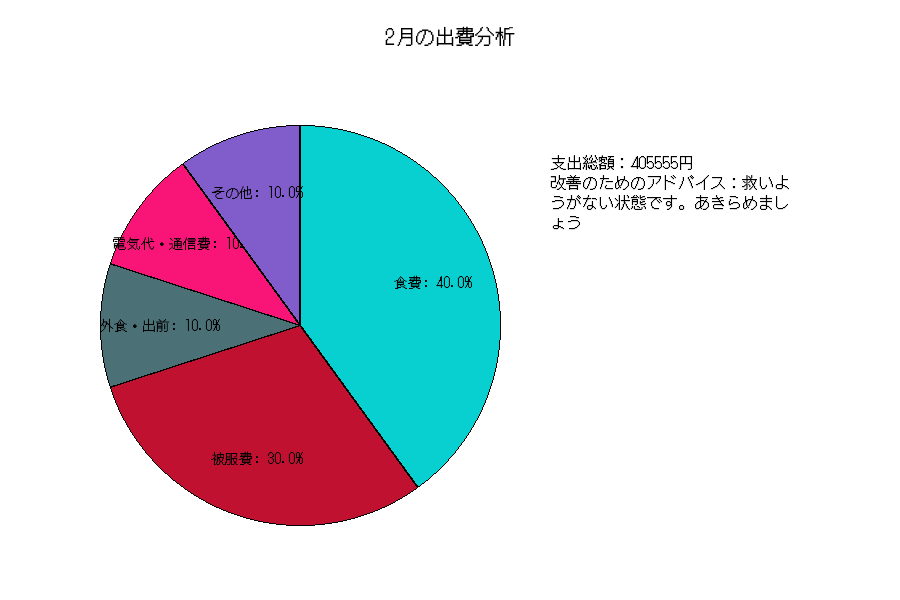

In [3]:
from IPython.display import Image as IPImage, display
# CSVをダウンロードしてワークスペース内に展開する。
download_file("https://raw.githubusercontent.com/study-basic/openai-tutorial/refs/heads/main/sample_credit_detail.csv", "sample_credit_detail.csv")
with open("sample_credit_detail.csv") as f:
    csv_text = f.read()
# この読み込んだCSVは文字列型です。以下のようにすると中身を確認できます。
# このCSVをChatGpt APIの入力に入れてみよう
# print(csv_text)

# ヒント：syuppi_category_list、amount、adviceをFunction Callingで生成してみましょう

syuppi_category_list = [{"name":"食費","ratio":0.4},{"name":"被服費","ratio":0.3},{"name":"外食・出前","ratio":0.1},{"name":"電気代・通信費","ratio":0.1},{"name":"その他","ratio":0.1}]

output_path="syuppi.png"
amount=405555
advice="救いようがない状態です。あきらめましょう"
create_pie_chart_pil(syuppi_category_list,"2月の出費分析",output_path,feature_text=f"支出総額：{amount}円　　　改善のためのアドバイス：{advice}")
display(IPImage(filename=output_path))


**追加課題2〜時間が余ってすることがない人用〜**

Function Callingを作って何か面白いものを作ってみよう。